<a href="https://colab.research.google.com/github/Mgobeaalcoba/Inferential_statistics_with_python/blob/main/Intervalos_de_Confianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Para calcular los intervalos de confianza debemos hacer lo siguiente:
1. Decidir que nivel de confianza deseamos, por ejemplo el 80%.
2. Eso significa que nos va a quedar un 20% de nuestra distribución por fuera de nuestra estimación: Ejemplo: En el 80% de los casos los esquiadores tienen entre 25 y 35 años de edad. Eso significa que tendremos un 10% de menores de 25 años y un 10% de mayores de 35 años.
3. Para poder obtener el indica zeta debemos sumar el porcentaje deseado más el porcentaje que quedaría a la izquierda de la distribución normal. En este caso 80% mas 10%.
4. Luego lo transformamos en numero: 0.9 en este ejemplo y buscamos ese valor, o el que más se le aproxime en la "tabla z" para luego sumar el valor que tendra nuestra referencia encontrada a nivel de columna y de fila. En nuestro ejemplo sería: +1,2 y 0,08 por lo que conformaría el intervalo (-1,28, 1,28)

Pego debajo ejemplo grafico de esta distribución de ejemplo y del uso de la tabla zeta seguido de la tabla zeta completa:

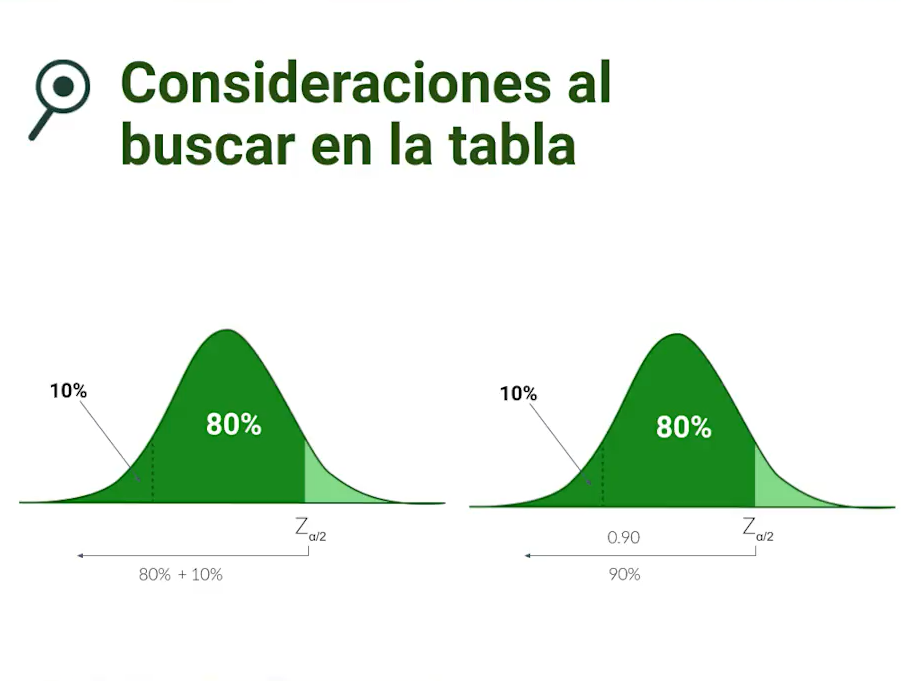

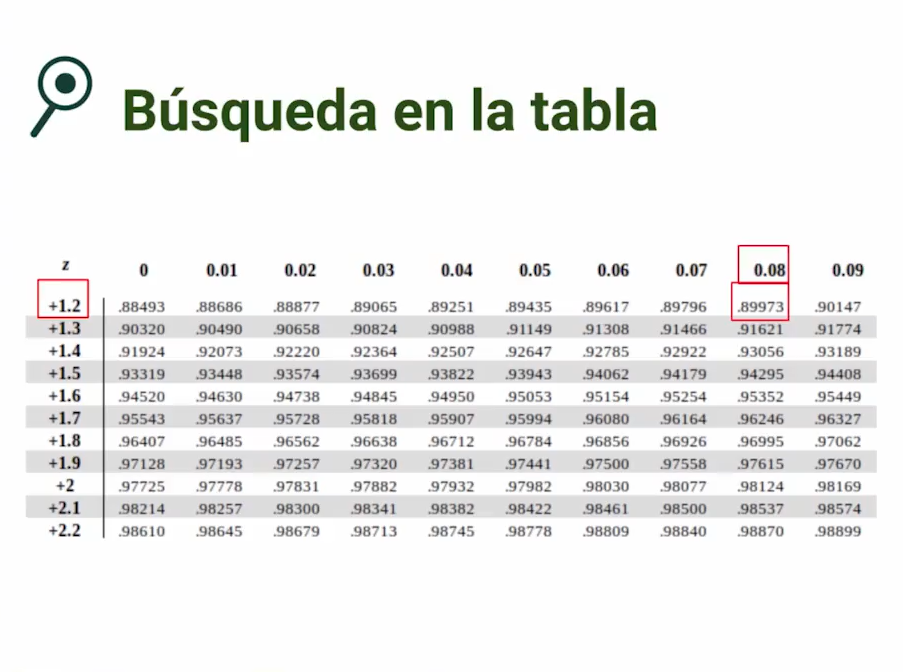

#### Tabla Zeta para intervalos de confianza.

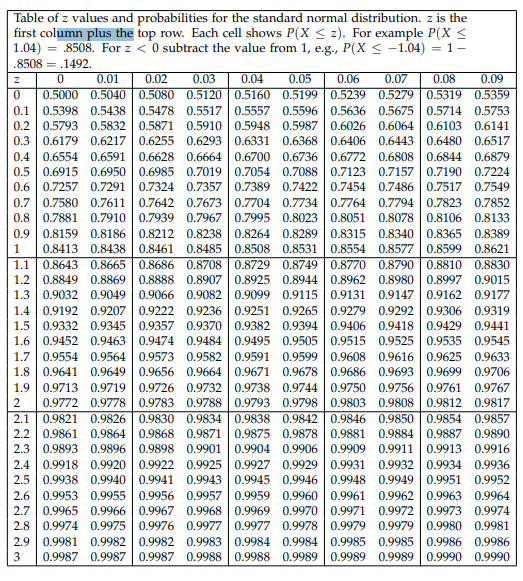

#### Con el valor z hallado estamos en condiciones de hallar los valores mínimo y máximo que están dentro de nuestro intervalo de confianza partiendo del promedio.
1. Ejemplo: Un cepillo de dientes dura 28 días con un 80% de confianza.
2. Eso significa que 28 días es la media poblacional
3. Otro dato que necesitamos es el desvio estandar que para este ejemplo será de 4 días.
4. Con zeta hallado: (-1,28 ; 1,28) podemos entonces aplicar la formula de conversion para encontrar los limites inferiores y superiores de nuestro intervalo de confianza. La misma es la siguiente:

"z" es igual a:

$$ [z = \frac{x - \mu}{\sigma}] $$



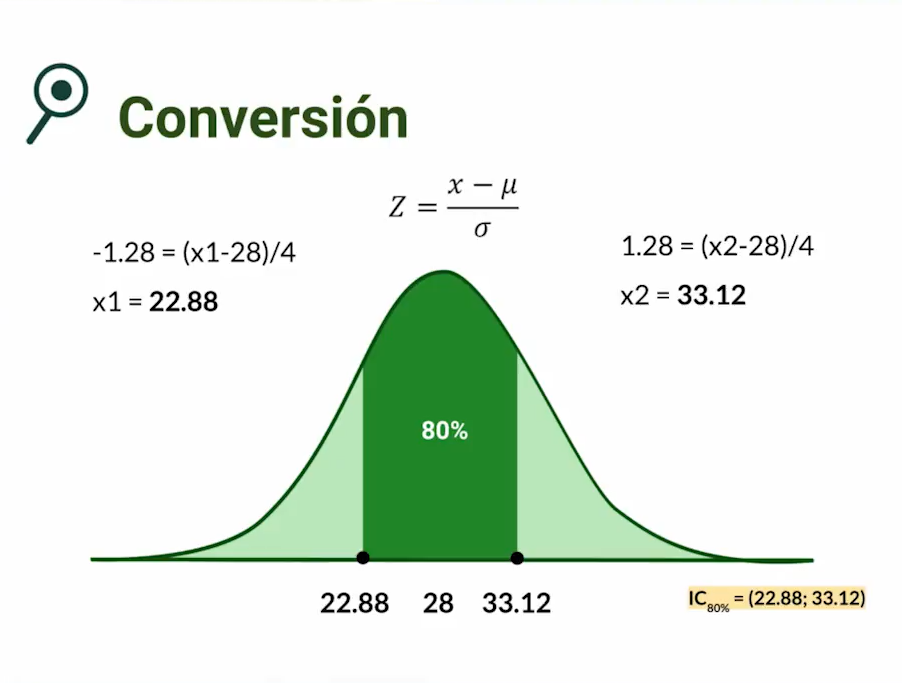

$$IC80=(22.88;33.12)$$
#### Es la forma en la que se establece entonces el rango del intervalo de confianza para un 80%

In [1]:
# Ahora hagamos esto pero con Python
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st # Se usa para calcular métodos estadisticos como los intervalos de confianza

In [7]:
# Haremos esta práctica sobre una distribución creada por nosotros.
np.random.seed(20) # Hacemos que la alatoriedad inicial se conserve siempre.
var1 = np.random.randint(0,10,10) # Días de vacaciones: 0 no se va de vacas y 10 se va 10 días. Le pedi 10 numeros enteros del 0 al 10
var2 = var1 + np.random.normal(0,1,10) # Dinero gastado: 0 no gasta nada y 1 se gasta todo. Le pedi 10 numeros float del 0 al 1

In [5]:
var1

array([3, 9, 4, 6, 7, 2, 0, 6, 8, 5])

In [6]:
var2

array([1.91516741, 9.55969629, 4.93946935, 5.02151896, 7.50309684,
       2.40641447, 0.32346101, 5.50658912, 7.20798321, 4.15763207])

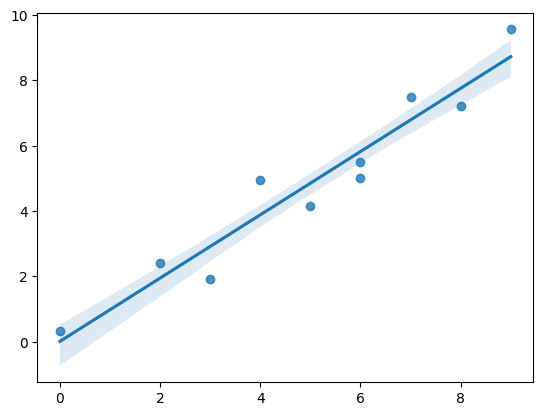

In [12]:
### Visualización de resultados con intervalo de confianza del 80%
grafico = sns.regplot(x=var1,
                      y=var2,
                      ci=80)
# Esperamos que estén relacionados: A más días de vacaciones, más dinero gastado.

El intervalo de confianza es la barra celeste clara a los costados de nuestra linea de regresión que nos indica con un 80% de confianza entre que puntos deberían estar ubicados nuestros puntos.

#### ¿Cuales son los números que marcan el intervalo de confianza?

In [13]:
mi_tuple = list(zip(var1, var2))
mi_tuple

[(3, 1.9151674126826672),
 (9, 9.559696289403918),
 (4, 4.939469349856077),
 (6, 5.021518957881304),
 (7, 7.503096840109191),
 (2, 2.406414468894801),
 (0, 0.3234610099156434),
 (6, 5.50658911809112),
 (8, 7.207983209222818),
 (5, 4.157632065861516)]

In [14]:
tabla = pd.DataFrame(mi_tuple, columns=['Días_vacaciones', 'Dinero_gastado'])
tabla

,Días_vacaciones,Dinero_gastado
0,3,1.915167
1,9,9.559696
2,4,4.939469
3,6,5.021519
4,7,7.503097
5,2,2.406414
6,0,0.323461
7,6,5.506589
8,8,7.207983
9,5,4.157632


In [20]:
# Intervalos de confianza al 95%

## Si la muestra o población (N) es menor (N<30) a 30 elementos entonces usamos la tabla t: Si es mayor usamos la distribución normal:
intervalos_confianza = st.t.interval(confidence=0.95,
                                     df=len(tabla)-1,
                                     loc=np.mean(tabla),
                                     scale=st.sem(tabla))
intervalos_confianza

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([3.00496491, 2.84767315]), array([6.99503509, 6.86053259]))

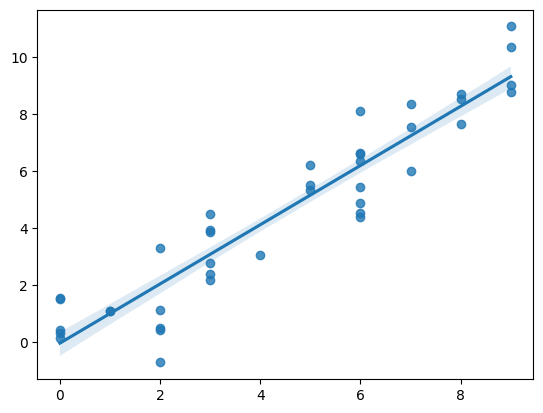

In [21]:
## Veamos ahora el caso con un N>30 y usando dist normal:

np.random.seed(20)
var3 = np.random.randint(0,10,40)
var4 = var3 + np.random.normal(0,1,40)

### Visualización de resultados con intervalo de confianza del 80%
grafico = sns.regplot(x=var3,
                      y=var4,
                      ci=80)

In [27]:
mi_tuple2 = list(zip(var3, var4))
tabla2 = pd.DataFrame(mi_tuple2, columns=['Días_vacaciones', 'Dinero_gastado'])

## Si la muestra o población (N) es mayor (N>30) a 30 elementos usamos la distribución normal:
intervalos_confianza = st.norm.interval(confidence=0.9,
                                     # df=len(tabla)-1,
                                     loc=np.mean(tabla),
                                     scale=st.sem(tabla))
intervalos_confianza

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([3.54937545, 3.39519309]), array([6.45062455, 6.31301265]))

#### Lectura de resultado:

1. La primera tupla del array trae la cota inferior de cada columna que pasemos. En este caso, el primer escalar será la cota inferior de días_vacaciones = 3,5 y el segundo scalar será la cuota inferior de dinero_gastado = 3.4
2. La segunda tupla del array trae la cota superior de cada columna que pasemos. En el ejemplo, el primer escalar será la cota superior de días_vacaciones = 6,4 y el segundo la cota superior de dinero_gastado = 6,3
3. Esto significa que con un 95% de confianza, los días de vacaciones que se tomará nuestra población van a estar entre 3,5 y 6,4 mientras que el dinero gastado va a estar entre 3,4 y 6,3.


#### Afirmación: Si el valor de significación es menor que el nivel de significación, el resultado es estadísticamente significativo.

La afirmación se refiere al concepto de **"significación estadística"**. Aquí está una explicación simple con ejemplos:

Imagina que estás realizando un estudio para ver si un nuevo medicamento es efectivo para reducir la fiebre en pacientes. Tienes dos grupos de pacientes: uno que recibió el medicamento y otro que recibió un placebo (un tratamiento falso). Quieres saber si el medicamento realmente hace una diferencia.

1. Nivel de Significación: Esto es como una "regla" que decides antes de realizar el estudio. Es cuánto estás dispuesto a aceptar la posibilidad de cometer un error al afirmar que el medicamento es efectivo cuando en realidad no lo es. Comúnmente se usa un nivel de significación del 5% (0.05), lo que significa que estás dispuesto a aceptar una probabilidad del 5% de cometer un error.

2. Valor de Significación: Después de realizar tu estudio, calculas algo llamado "valor p". Este valor indica la probabilidad de que los resultados que obtuviste sean puramente aleatorios (no debido al medicamento).

Ahora, aquí viene la afirmación:

3. Si el Valor de Significación es Menor que el Nivel de Significación: Esto significa que la probabilidad de que los resultados sean puramente aleatorios es muy baja, menor al nivel de significación que habías establecido. En otras palabras, es poco probable que los resultados sean debidos al azar.
Ejemplo:

*Supongamos que realizas tu estudio y obtienes un valor p de 0.03 (3%). Si tu nivel de significación es 0.05 (5%), entonces el valor p (0.03) es menor que el nivel de significación (0.05). En este caso, dirías que tus resultados son "estadísticamente significativos". Esto sugiere que el medicamento podría tener un efecto real en la reducción de la fiebre, ya que es poco probable que los resultados sean solo por casualidad.*

**En resumen, cuando el Valor de Significación es menor que el Nivel de Significación, significa que los resultados son estadísticamente significativos y hay evidencia para respaldar la idea de que hay una diferencia real o un efecto en el estudio.**